In [2]:
import pickle
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [343]:
# Controls appearance of seaborn plots. Options: paper, notebook, talk, or poster
SEABORN_CONTEXT = 'talk' 
SEABORN_PALETTE = sns.color_palette("bright")

sns.set_context(SEABORN_CONTEXT)

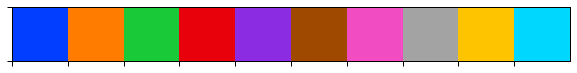

In [339]:
sns.palplot(SEABORN_PALETTE)

In [17]:
df_population = pd.read_csv('PEP_2018_PEPANNRES_with_ann.csv', encoding='latin1')
df_population = df_population.groupby('State', as_index=False)['Population'].sum()
df_population = df_population.rename(columns={"State": "state", "Population": "population"})
df_population

,state,population
0,Alabama,4887871
1,Alaska,737438
2,Arizona,7171646
3,Arkansas,3013825
4,California,39557045
5,Colorado,5695564
6,Connecticut,3572665
7,Delaware,967171
8,District of Columbia,702455
9,Florida,21299325


In [340]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')
df = df.loc[df['fips'].notnull()]
df['fips'] = df['fips'].astype(int)
df


,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061,1,0
1,2020-01-22,Snohomish,Washington,53061,1,0
2,2020-01-23,Snohomish,Washington,53061,1,0
3,2020-01-24,Cook,Illinois,17031,1,0
4,2020-01-24,Snohomish,Washington,53061,1,0
...,...,...,...,...,...,...
19708,2020-03-29,Sheridan,Wyoming,56033,6,0
19709,2020-03-29,Sublette,Wyoming,56035,1,0
19710,2020-03-29,Sweetwater,Wyoming,56037,1,0
19711,2020-03-29,Teton,Wyoming,56039,14,0


In [ ]:
df = df.loc[df['date'] == '2020-03-29'].sort_values('cases', ascending=False).head(60)
df

In [ ]:
# df_hospitals.loc[df_hospitals['fips'] == 'NOT AVAILABLE']

In [ ]:
df_hospitals = pd.read_csv('us-hospitals.csv')
df_hospitals = df_hospitals.rename(columns={"COUNTYFIPS": "fips", "BEDS": "beds"})
df_hospitals = df_hospitals.loc[(df_hospitals.beds != -999) & (df_hospitals['fips'] != 'NOT AVAILABLE')]
df_hospitals['fips'] = df_hospitals['fips'].astype(int)
df_hospitals

In [ ]:
df_hospitals.columns

In [ ]:
beds_per_county = df_hospitals.groupby('fips', as_index=False)['beds'].sum().sort_values(by='beds', ascending=False)
beds_per_county_50 = beds_per_county.head(50)
beds_per_county

In [213]:
df_hospitals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6915 entries, 0 to 7574
Data columns (total 34 columns):
X             6915 non-null float64
Y             6915 non-null float64
OBJECTID      6915 non-null int64
ID            6915 non-null int64
NAME          6915 non-null object
ADDRESS       6915 non-null object
CITY          6915 non-null object
STATE         6915 non-null object
ZIP           6915 non-null int64
ZIP4          6915 non-null object
TELEPHONE     6915 non-null object
TYPE          6915 non-null object
STATUS        6915 non-null object
POPULATION    6915 non-null int64
COUNTY        6915 non-null object
fips          6915 non-null int64
COUNTRY       6915 non-null object
LATITUDE      6915 non-null float64
LONGITUDE     6915 non-null float64
NAICS_CODE    6915 non-null int64
NAICS_DESC    6915 non-null object
SOURCE        6915 non-null object
SOURCEDATE    6915 non-null object
VAL_METHOD    6915 non-null object
VAL_DATE      6915 non-null object
WEBSITE       6915 n

In [214]:
df_merged = df.merge(beds_per_county, how='left', on='fips').sort_values(by='cases', ascending=False)
df_merged_50 = df_merged.head(50)
df_merged_50

,date,county,state,fips,cases,deaths,beds
0,2020-03-29,Westchester,New York,36119,8519,10,3235
1,2020-03-29,Nassau,New York,36059,6445,39,4343
2,2020-03-29,Suffolk,New York,36103,5023,40,3583
3,2020-03-29,Cook,Illinois,17031,3445,40,18259
4,2020-03-29,Wayne,Michigan,26163,2704,56,6079
5,2020-03-29,Rockland,New York,36087,2209,8,1169
6,2020-03-29,Bergen,New Jersey,34003,2169,35,3019
7,2020-03-29,King,Washington,53033,2163,146,5461
8,2020-03-29,Los Angeles,California,6037,2136,37,30371
9,2020-03-29,Miami-Dade,Florida,12086,1471,3,10243


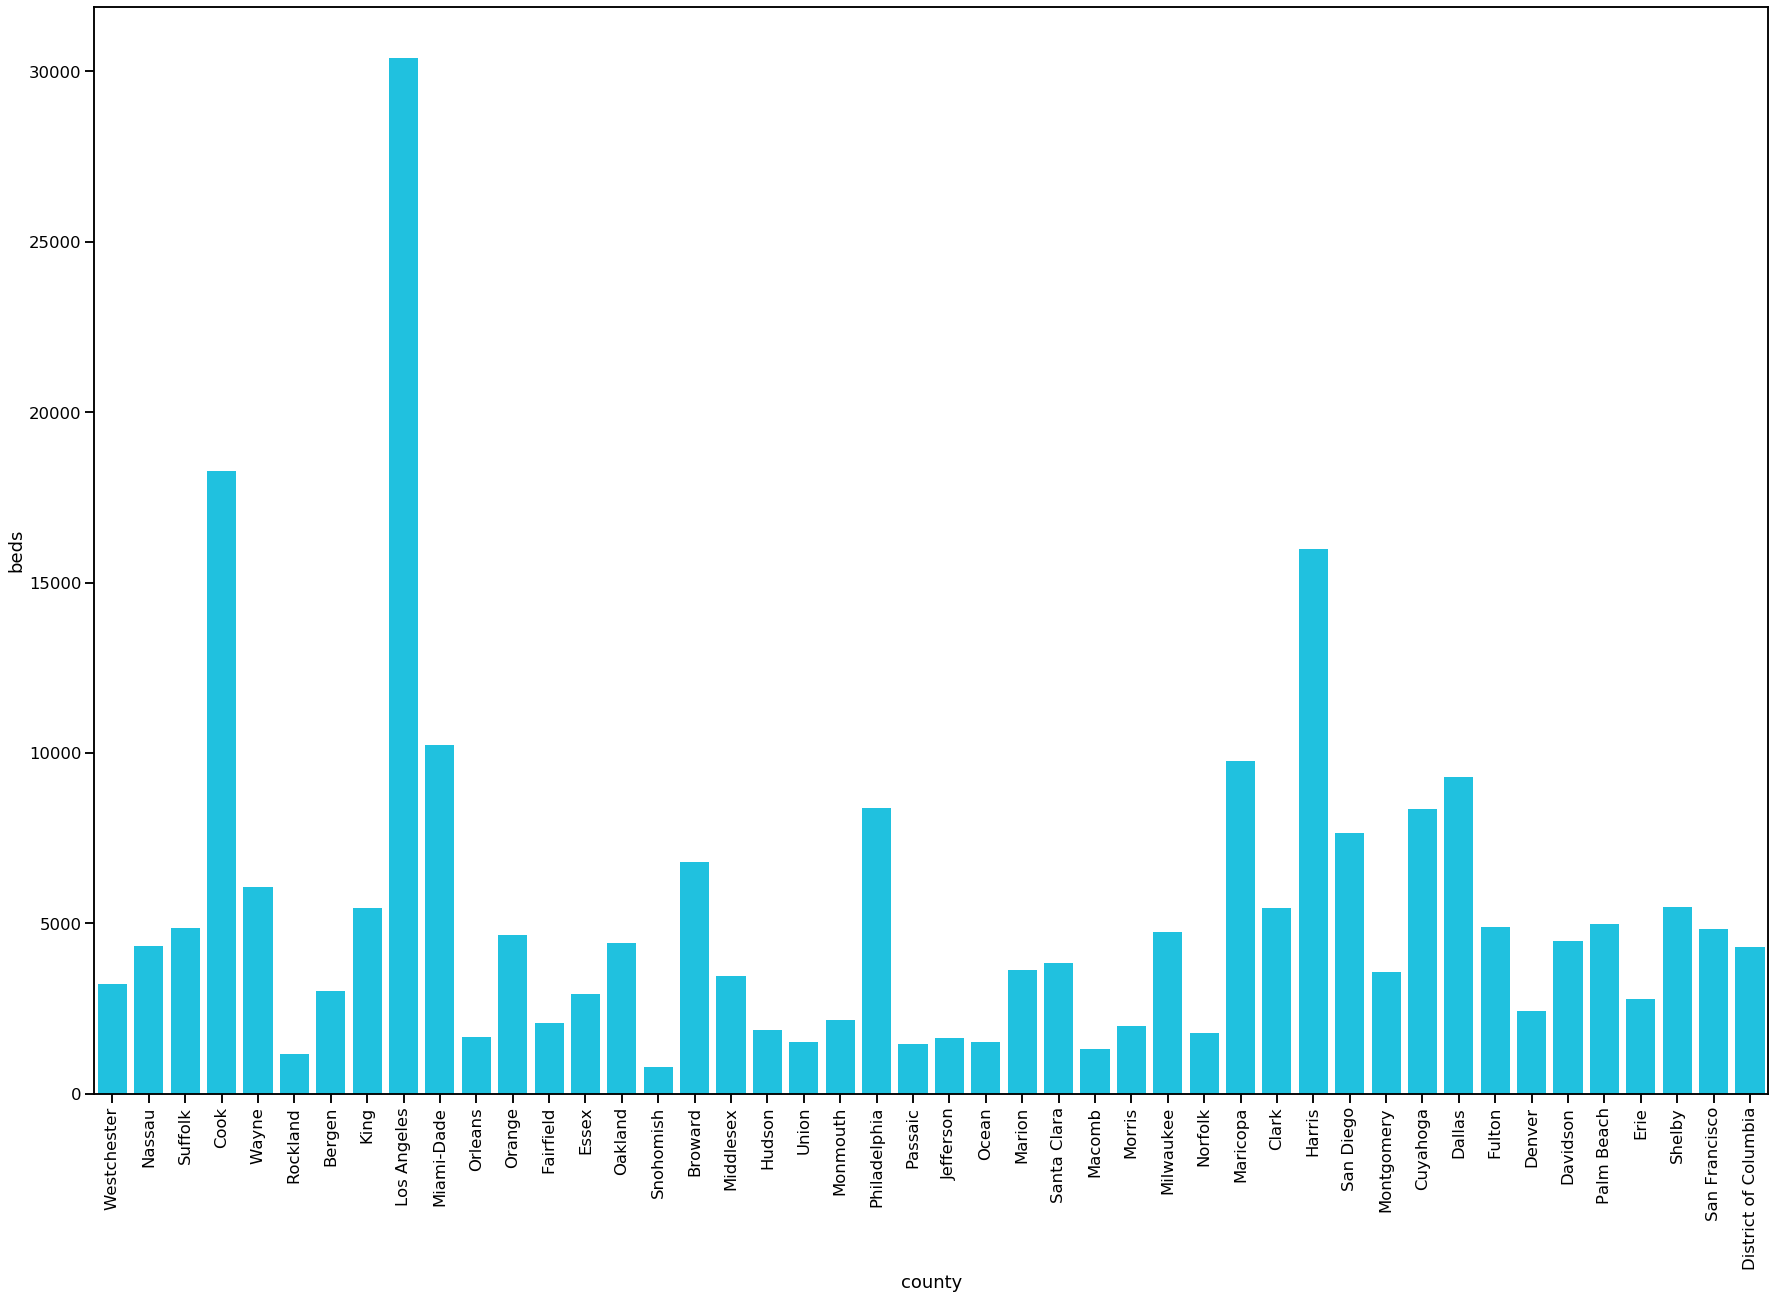

In [324]:
plt.figure(figsize=(30,20))
sns.barplot(x=df_merged_50['county'], y=df_merged_50['beds'], color=SEABORN_PALETTE[9], ci=False)
plt.xticks(rotation=90);

In [21]:
df_population

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 2 columns):
state         51 non-null object
population    51 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


In [22]:
df_states = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')
df_states['date'] = pd.to_datetime(df_states['date'])
df_states = df_states.loc[df_states['date'] > '2020-03-04']
df_states = df_states.merge(df_population, how='left', on='state')
df_states


,date,state,fips,cases,deaths,population
0,2020-03-05,Arizona,4,2,0,NaN
1,2020-03-05,California,6,67,1,NaN
2,2020-03-05,Colorado,8,2,0,NaN
3,2020-03-05,Florida,12,4,0,NaN
4,2020-03-05,Georgia,13,2,0,NaN
...,...,...,...,...,...,...
1193,2020-03-29,Virginia,51,890,22,NaN
1194,2020-03-29,Washington,53,4896,207,NaN
1195,2020-03-29,West Virginia,54,124,1,NaN
1196,2020-03-29,Wisconsin,55,1120,17,NaN


In [331]:
df_states.info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1246 entries, 253 to 1498
Data columns (total 5 columns):
date      1246 non-null datetime64[ns]
state     1246 non-null object
fips      1246 non-null int64
cases     1246 non-null int64
deaths    1246 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 58.4+ KB


In [374]:
# df_ny = df_states.loc[df_states['state'] == 'New York']
# df_nj = df_states.loc[df_states['state'] == 'New Jersey']

In [375]:
df_states_latest = df_states.loc[df_states['date'] == '2020-03-29'].sort_values(by='cases', ascending=False)
df_states_latest

,date,state,fips,cases,deaths
1477,2020-03-29,New York,36,59568,965
1475,2020-03-29,New Jersey,34,13386,161
1448,2020-03-29,California,6,6266,130
1467,2020-03-29,Michigan,26,5486,132
1466,2020-03-29,Massachusetts,25,4955,48
1453,2020-03-29,Florida,12,4942,59
1495,2020-03-29,Washington,53,4896,207
1458,2020-03-29,Illinois,17,4613,70
1463,2020-03-29,Louisiana,22,3540,152
1484,2020-03-29,Pennsylvania,42,3441,40


In [376]:
group_size = 10
state_groups = []

# Initialize empty arrays for groups of states
for i in np.arange(0, len(df_states_latest['state']), group_size): 
    state_groups.append([])
    
for i, state in enumerate(df_states_latest['state']):
    state_groups[i // group_size].append(state)

state_groups

[['New York',
  'New Jersey',
  'California',
  'Michigan',
  'Massachusetts',
  'Florida',
  'Washington',
  'Illinois',
  'Louisiana',
  'Pennsylvania'],
 ['Texas',
  'Georgia',
  'Colorado',
  'Connecticut',
  'Ohio',
  'Tennessee',
  'Indiana',
  'Maryland',
  'North Carolina',
  'Wisconsin'],
 ['Arizona',
  'Nevada',
  'Missouri',
  'Virginia',
  'Alabama',
  'South Carolina',
  'Mississippi',
  'Utah',
  'Oregon',
  'Minnesota'],
 ['Arkansas',
  'Kentucky',
  'Oklahoma',
  'District of Columbia',
  'Iowa',
  'Kansas',
  'Idaho',
  'Rhode Island',
  'New Hampshire',
  'Maine'],
 ['New Mexico',
  'Vermont',
  'Delaware',
  'Hawaii',
  'Montana',
  'Nebraska',
  'Puerto Rico',
  'West Virginia',
  'Alaska',
  'North Dakota'],
 ['South Dakota',
  'Wyoming',
  'Guam',
  'Virgin Islands',
  'Northern Mariana Islands']]

In [23]:
# states_0 = df_states.loc[df_states['state'].isin(state_groups[0])]

# plt.figure(figsize=(30,20))
# sns.lineplot(x=states_0['date'], y=states_0['cases'], hue=states_0['state'], marker="o", dashes=False, ci=False)
# plt.xticks(rotation=90);
# plt.tight_layout()
# plt.show()

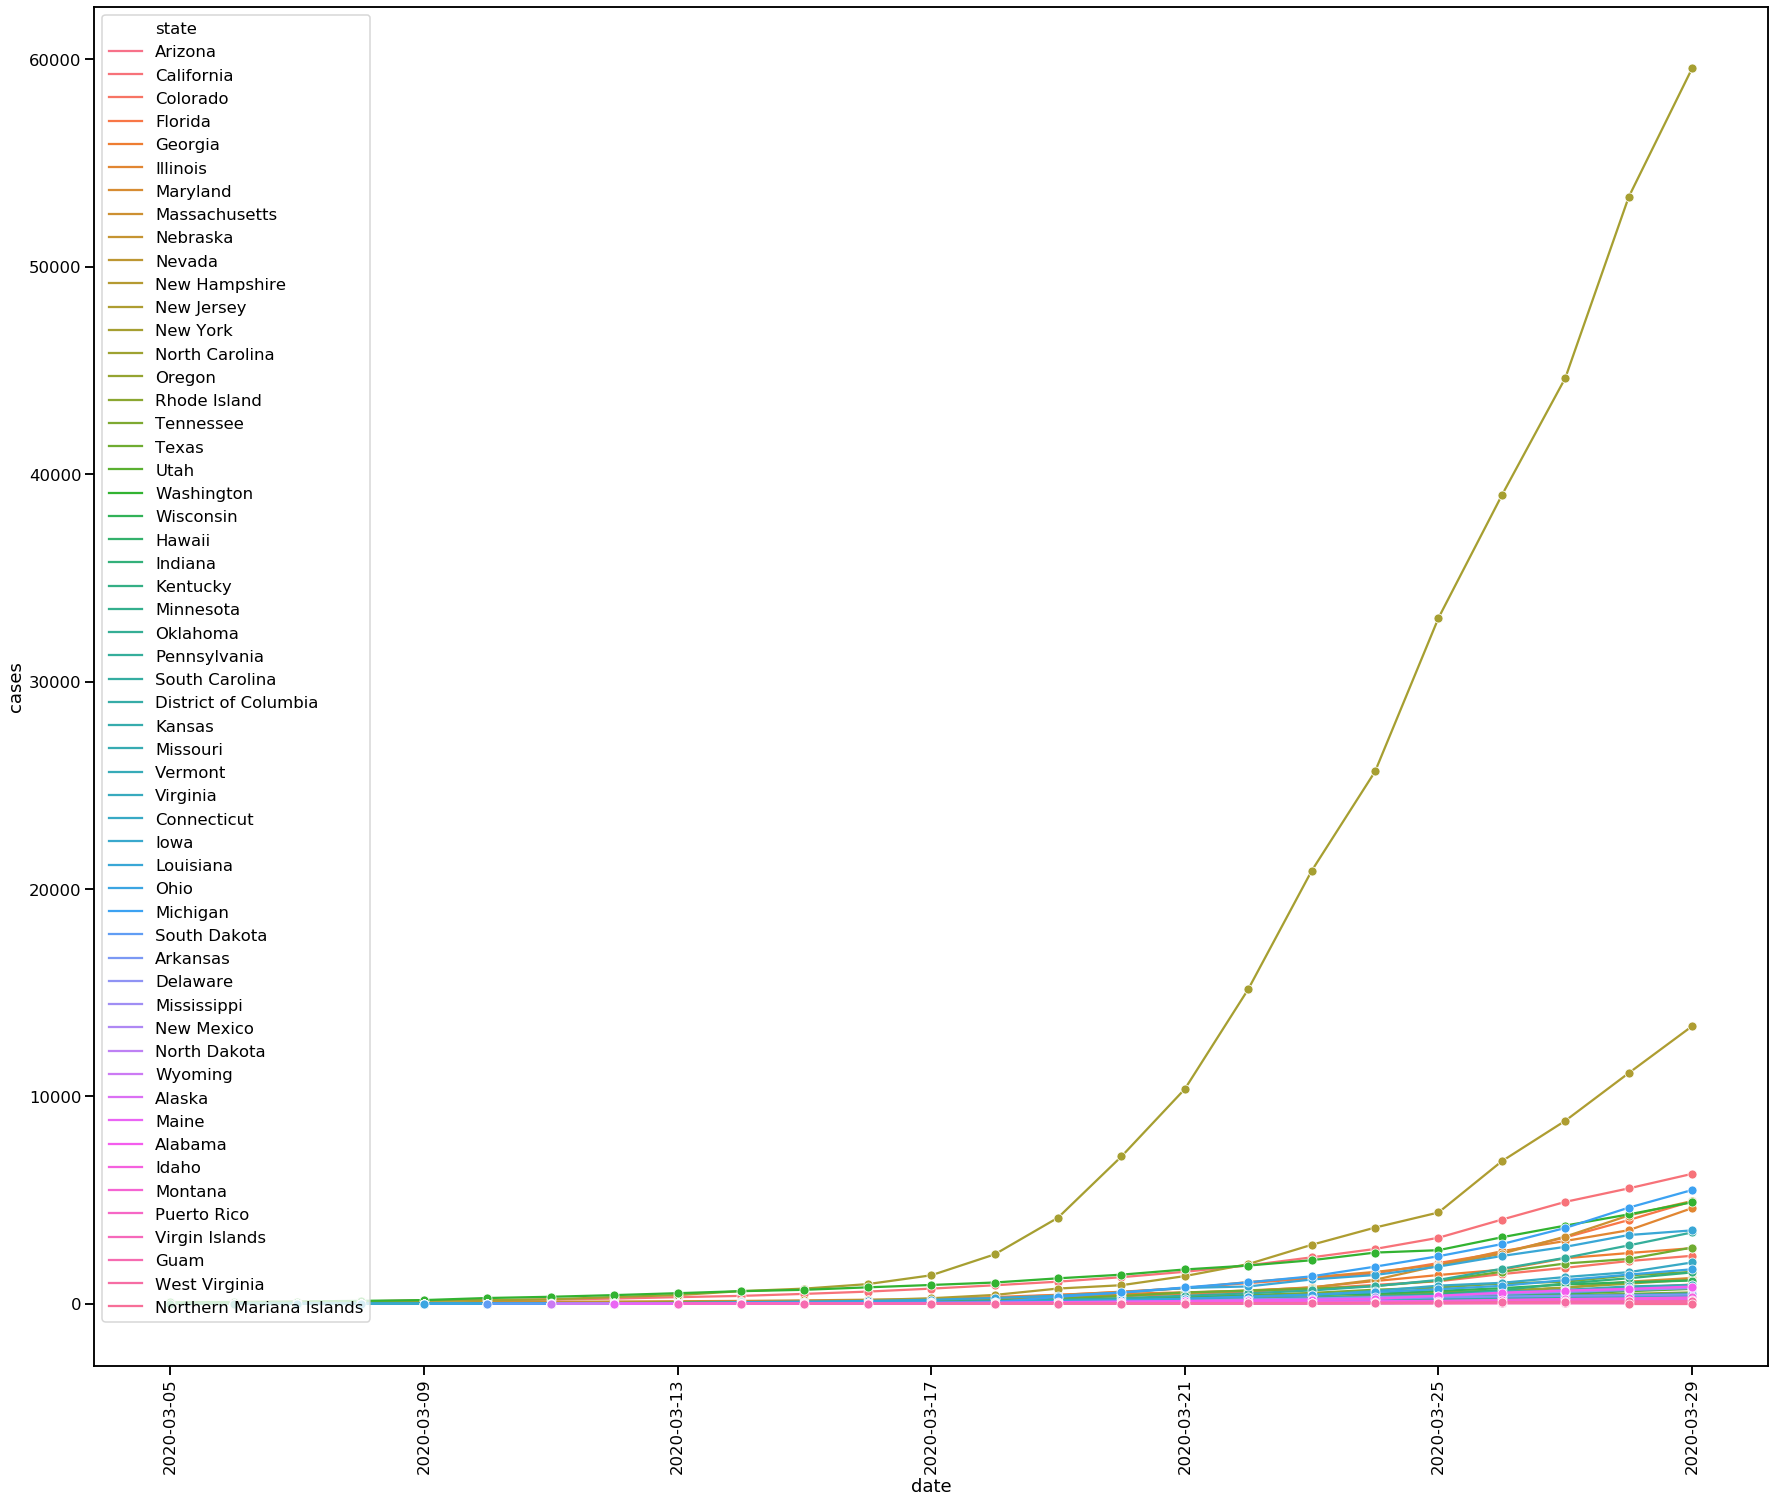

In [384]:
plt.figure(figsize=(30,25))
sns.lineplot(x=df_states['date'], y=df_states['cases'], hue=df_states['state'], marker='o', ci=False)
plt.xticks(rotation=90);

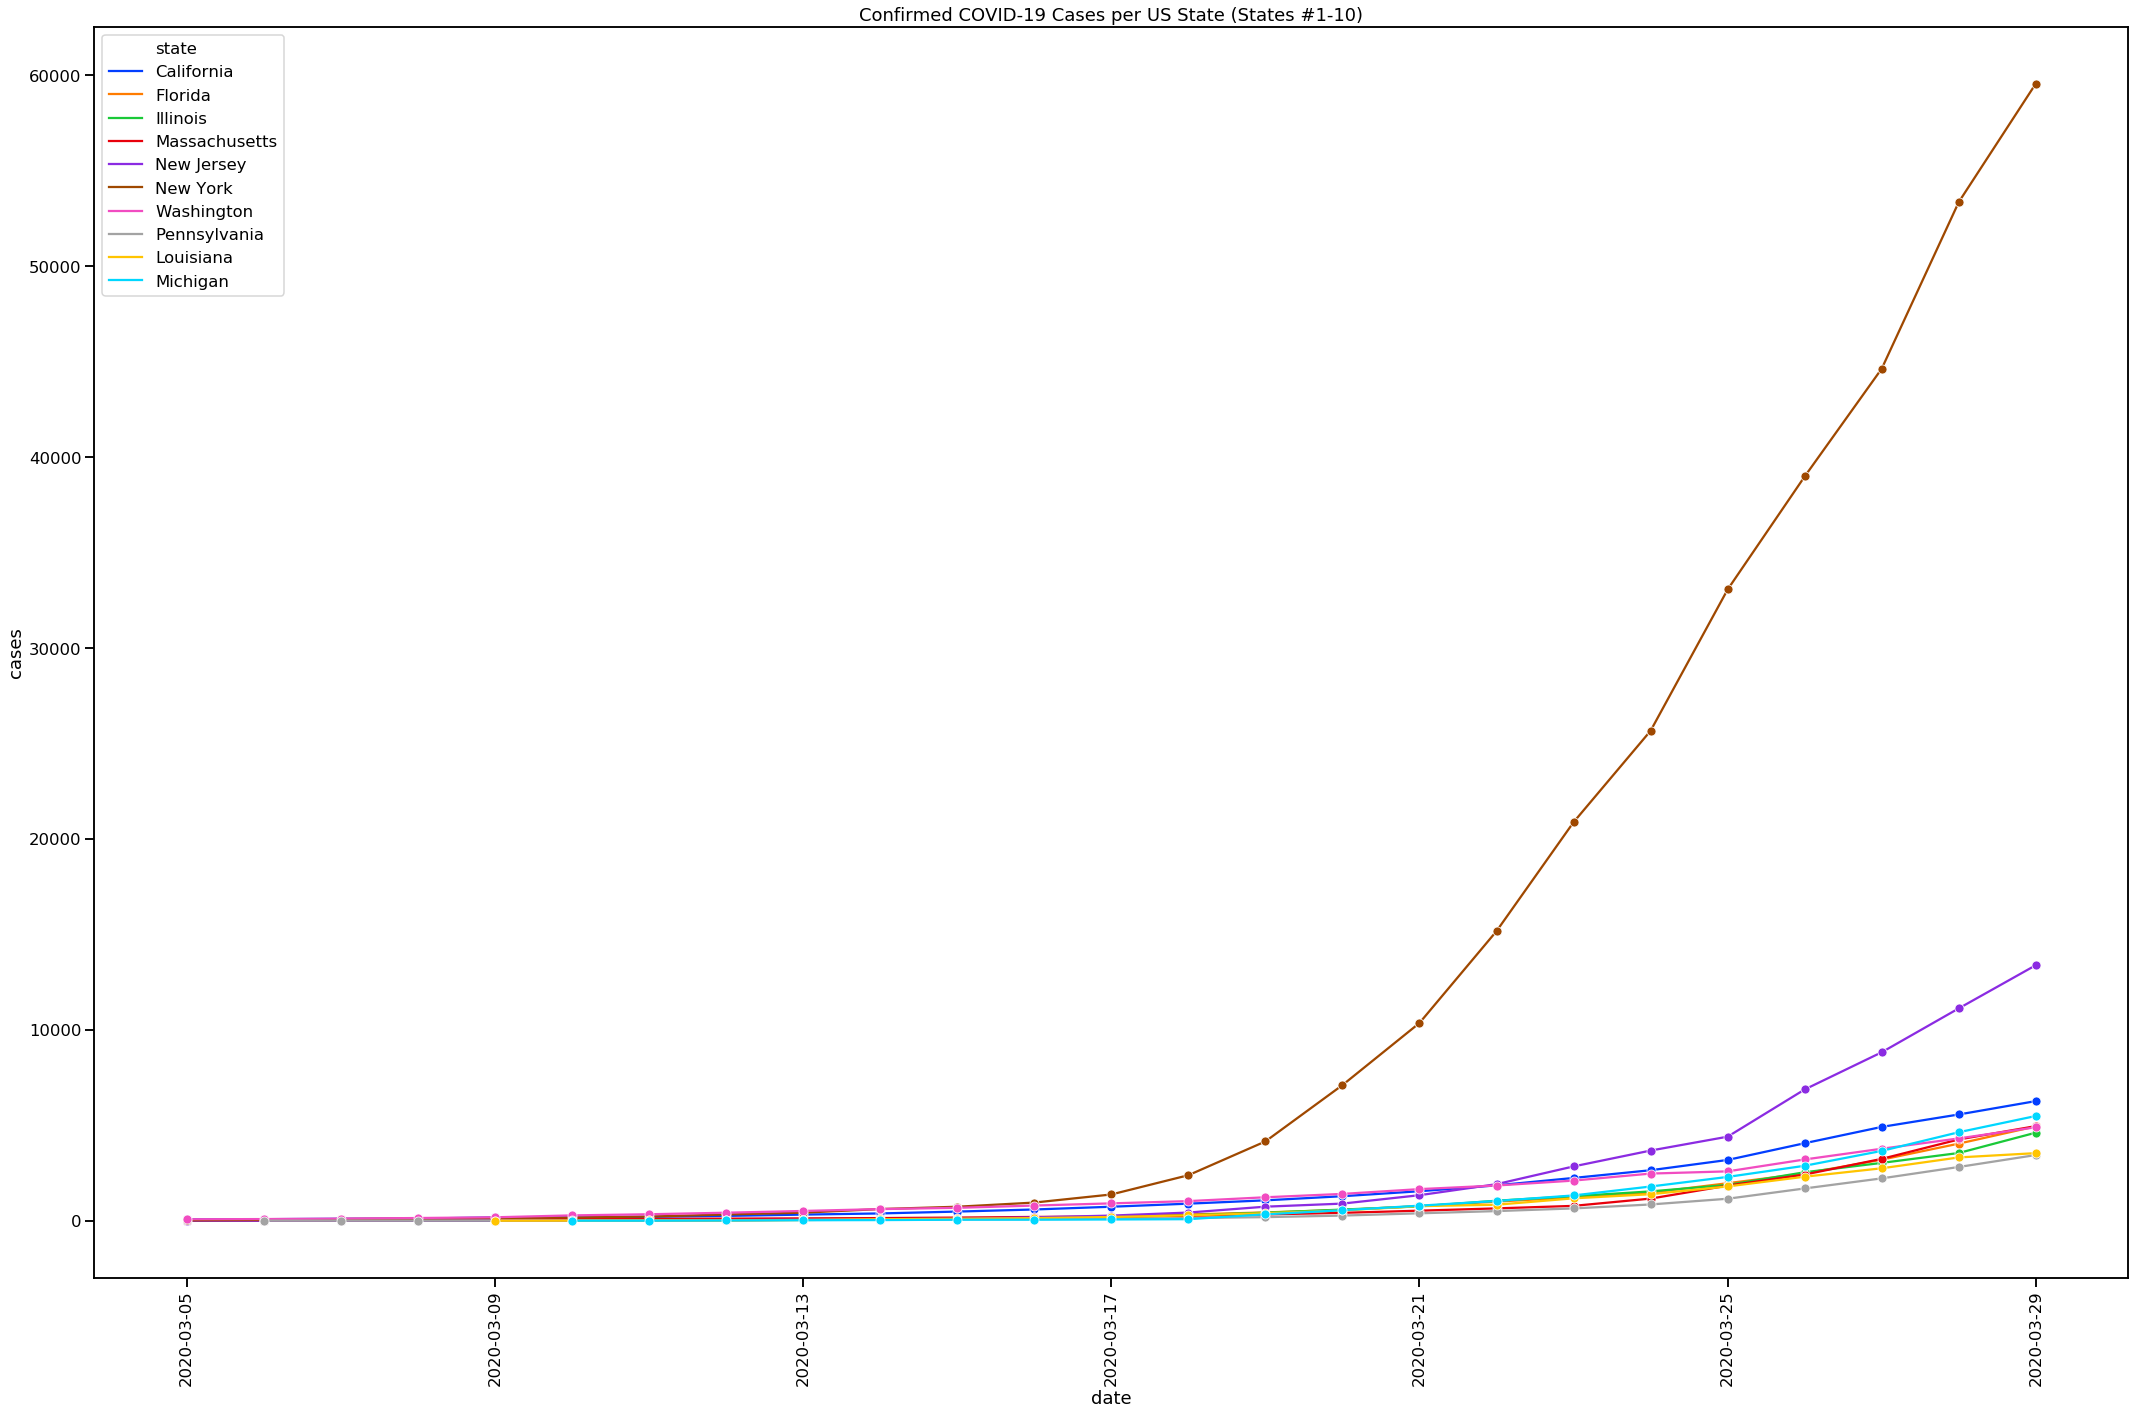

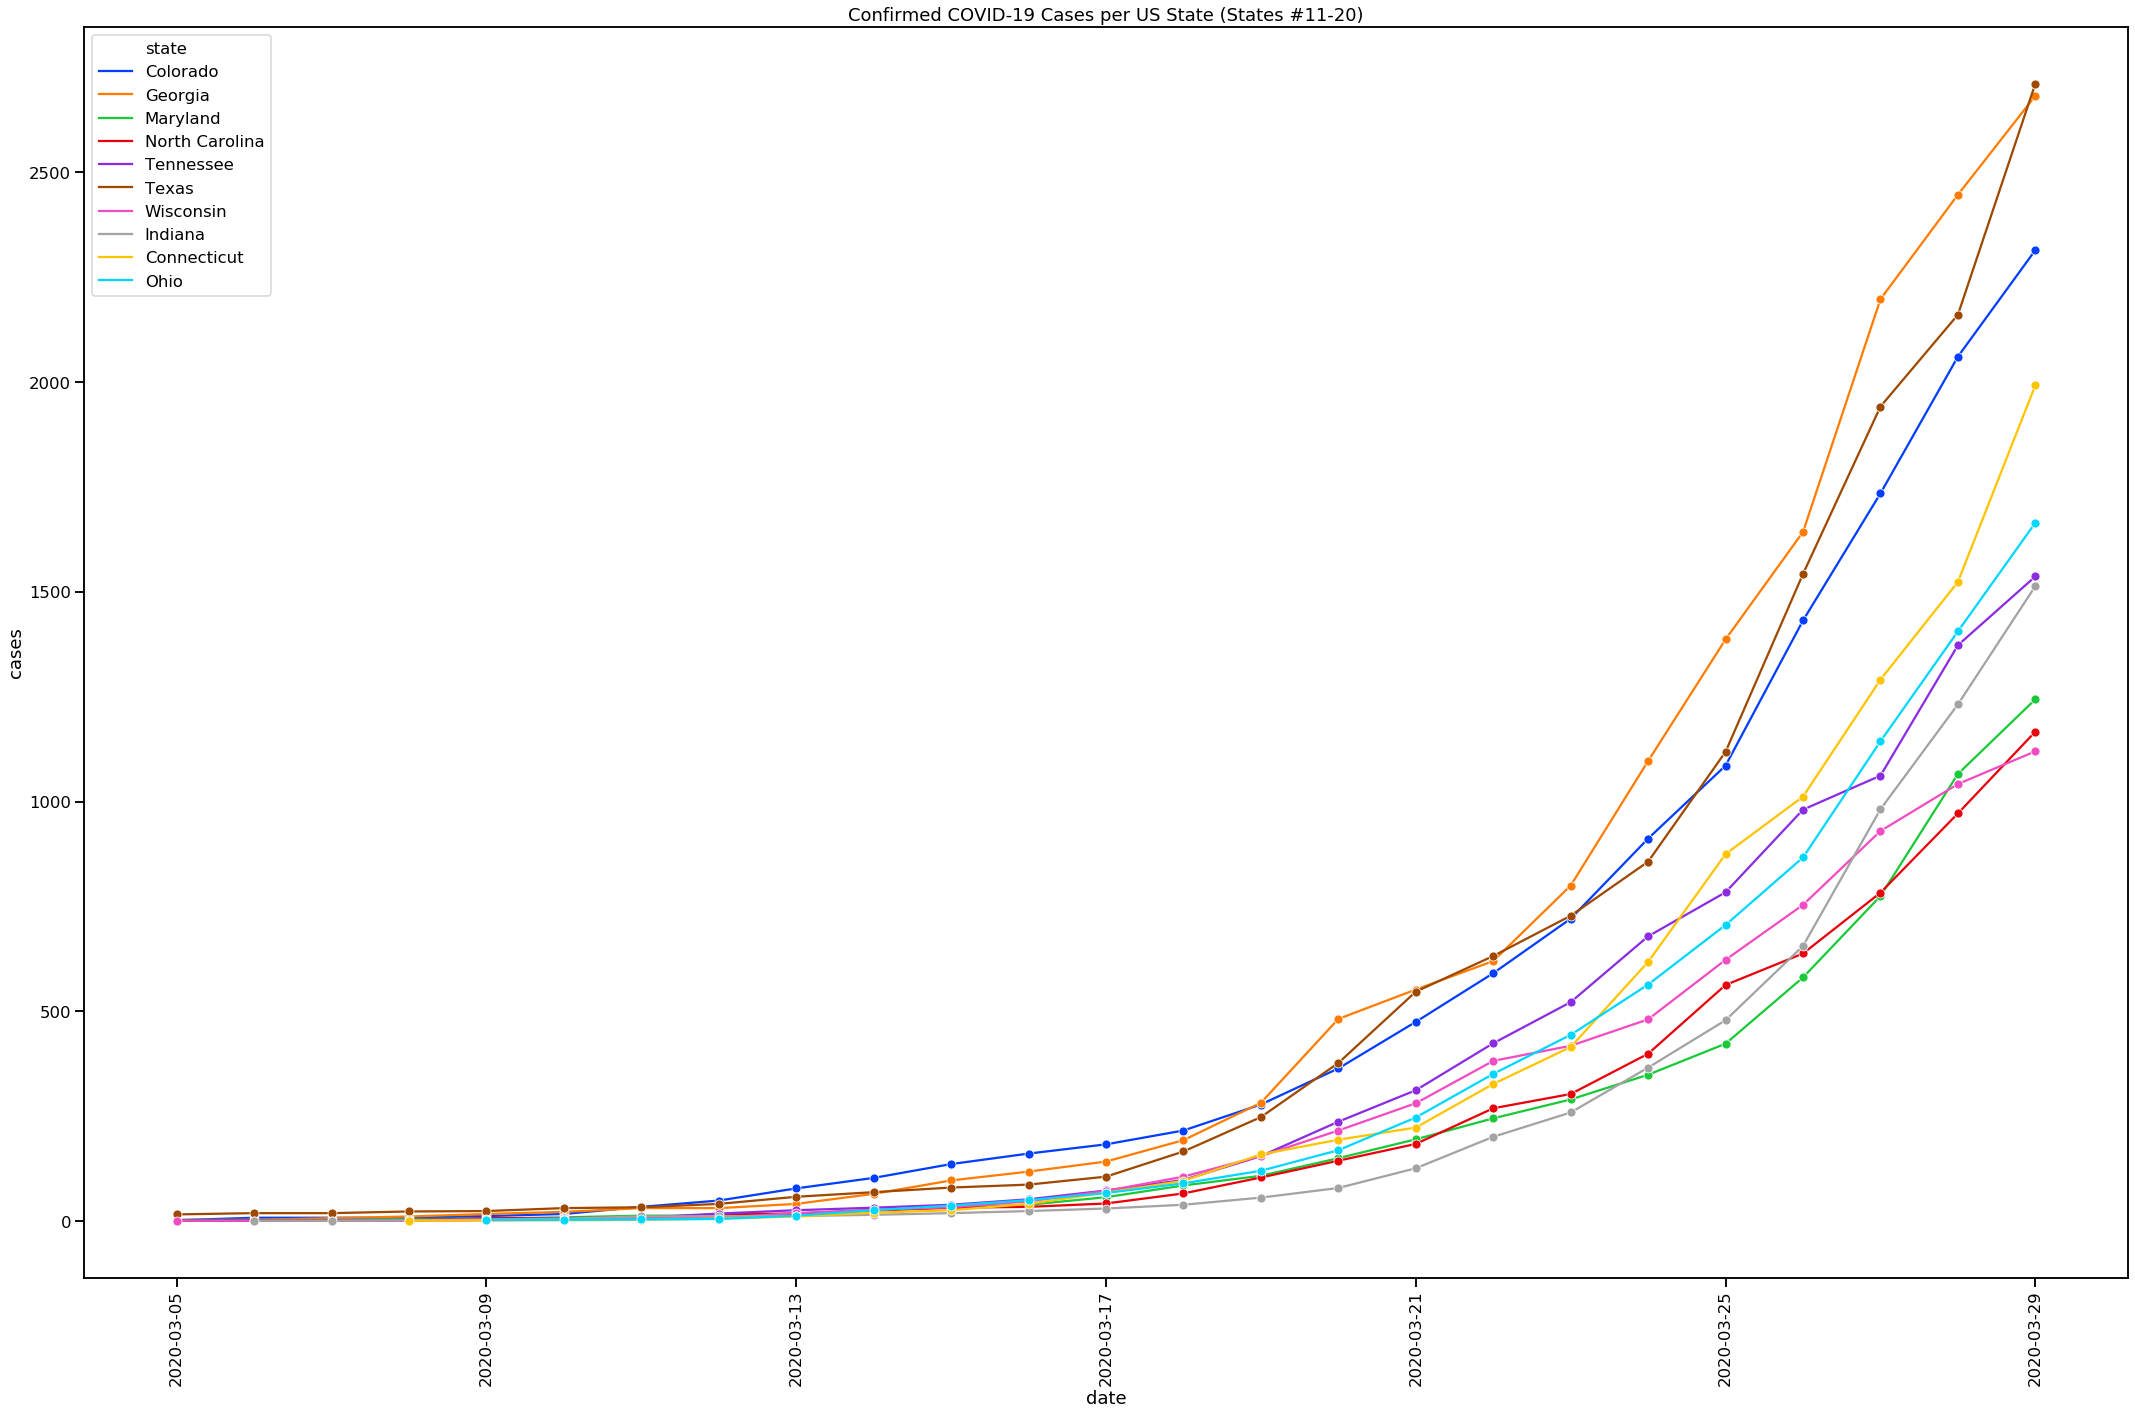

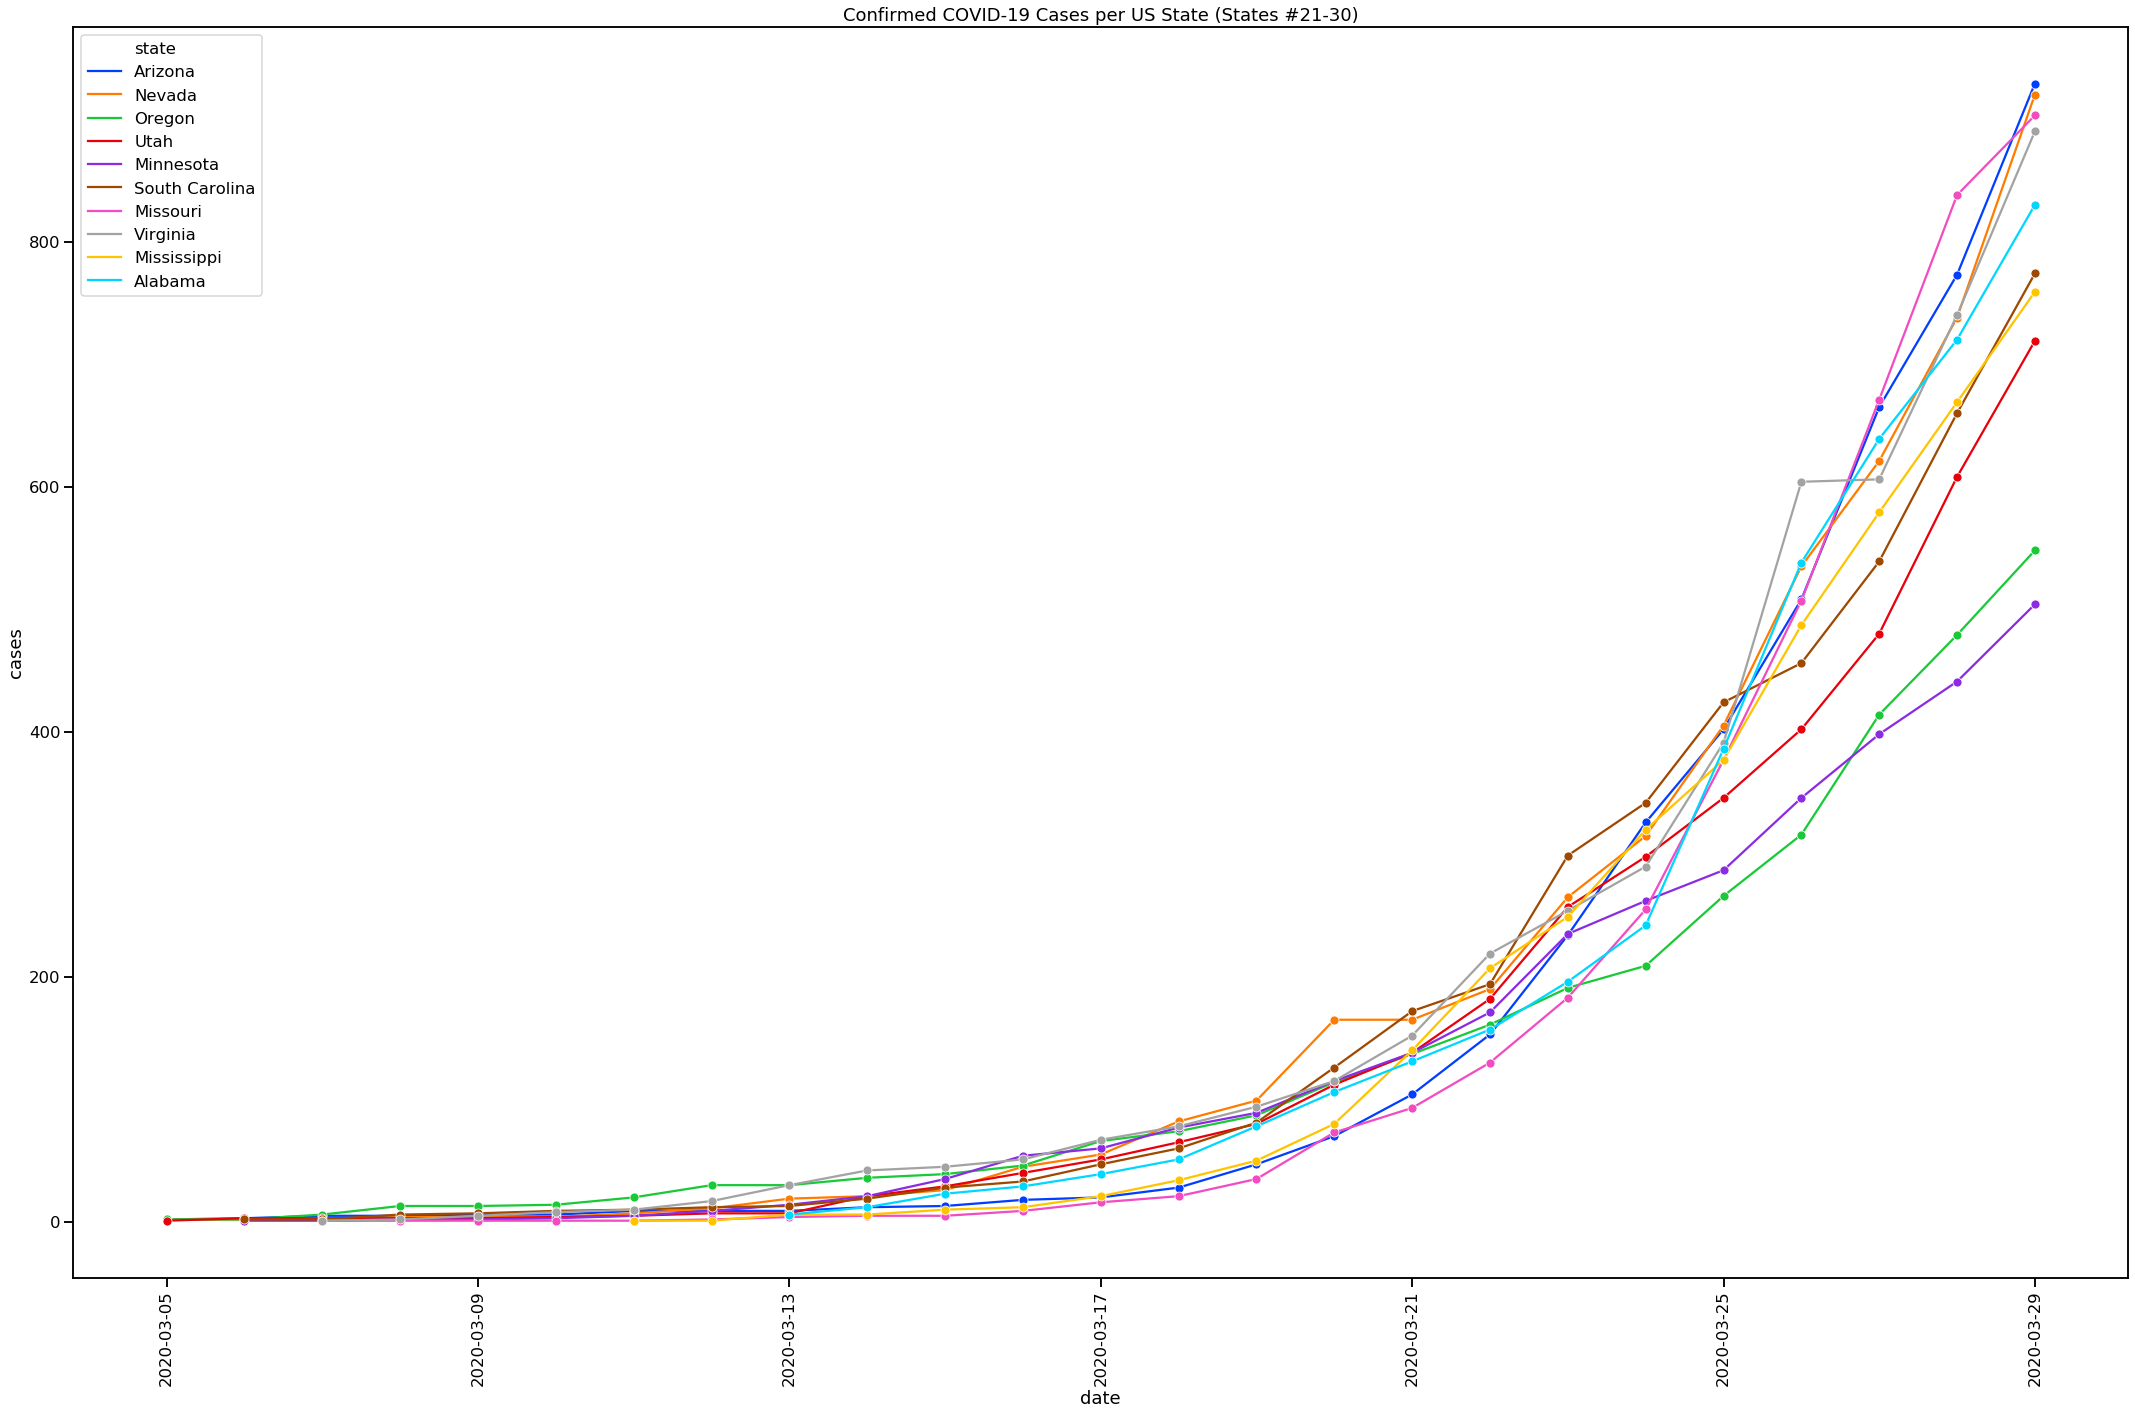

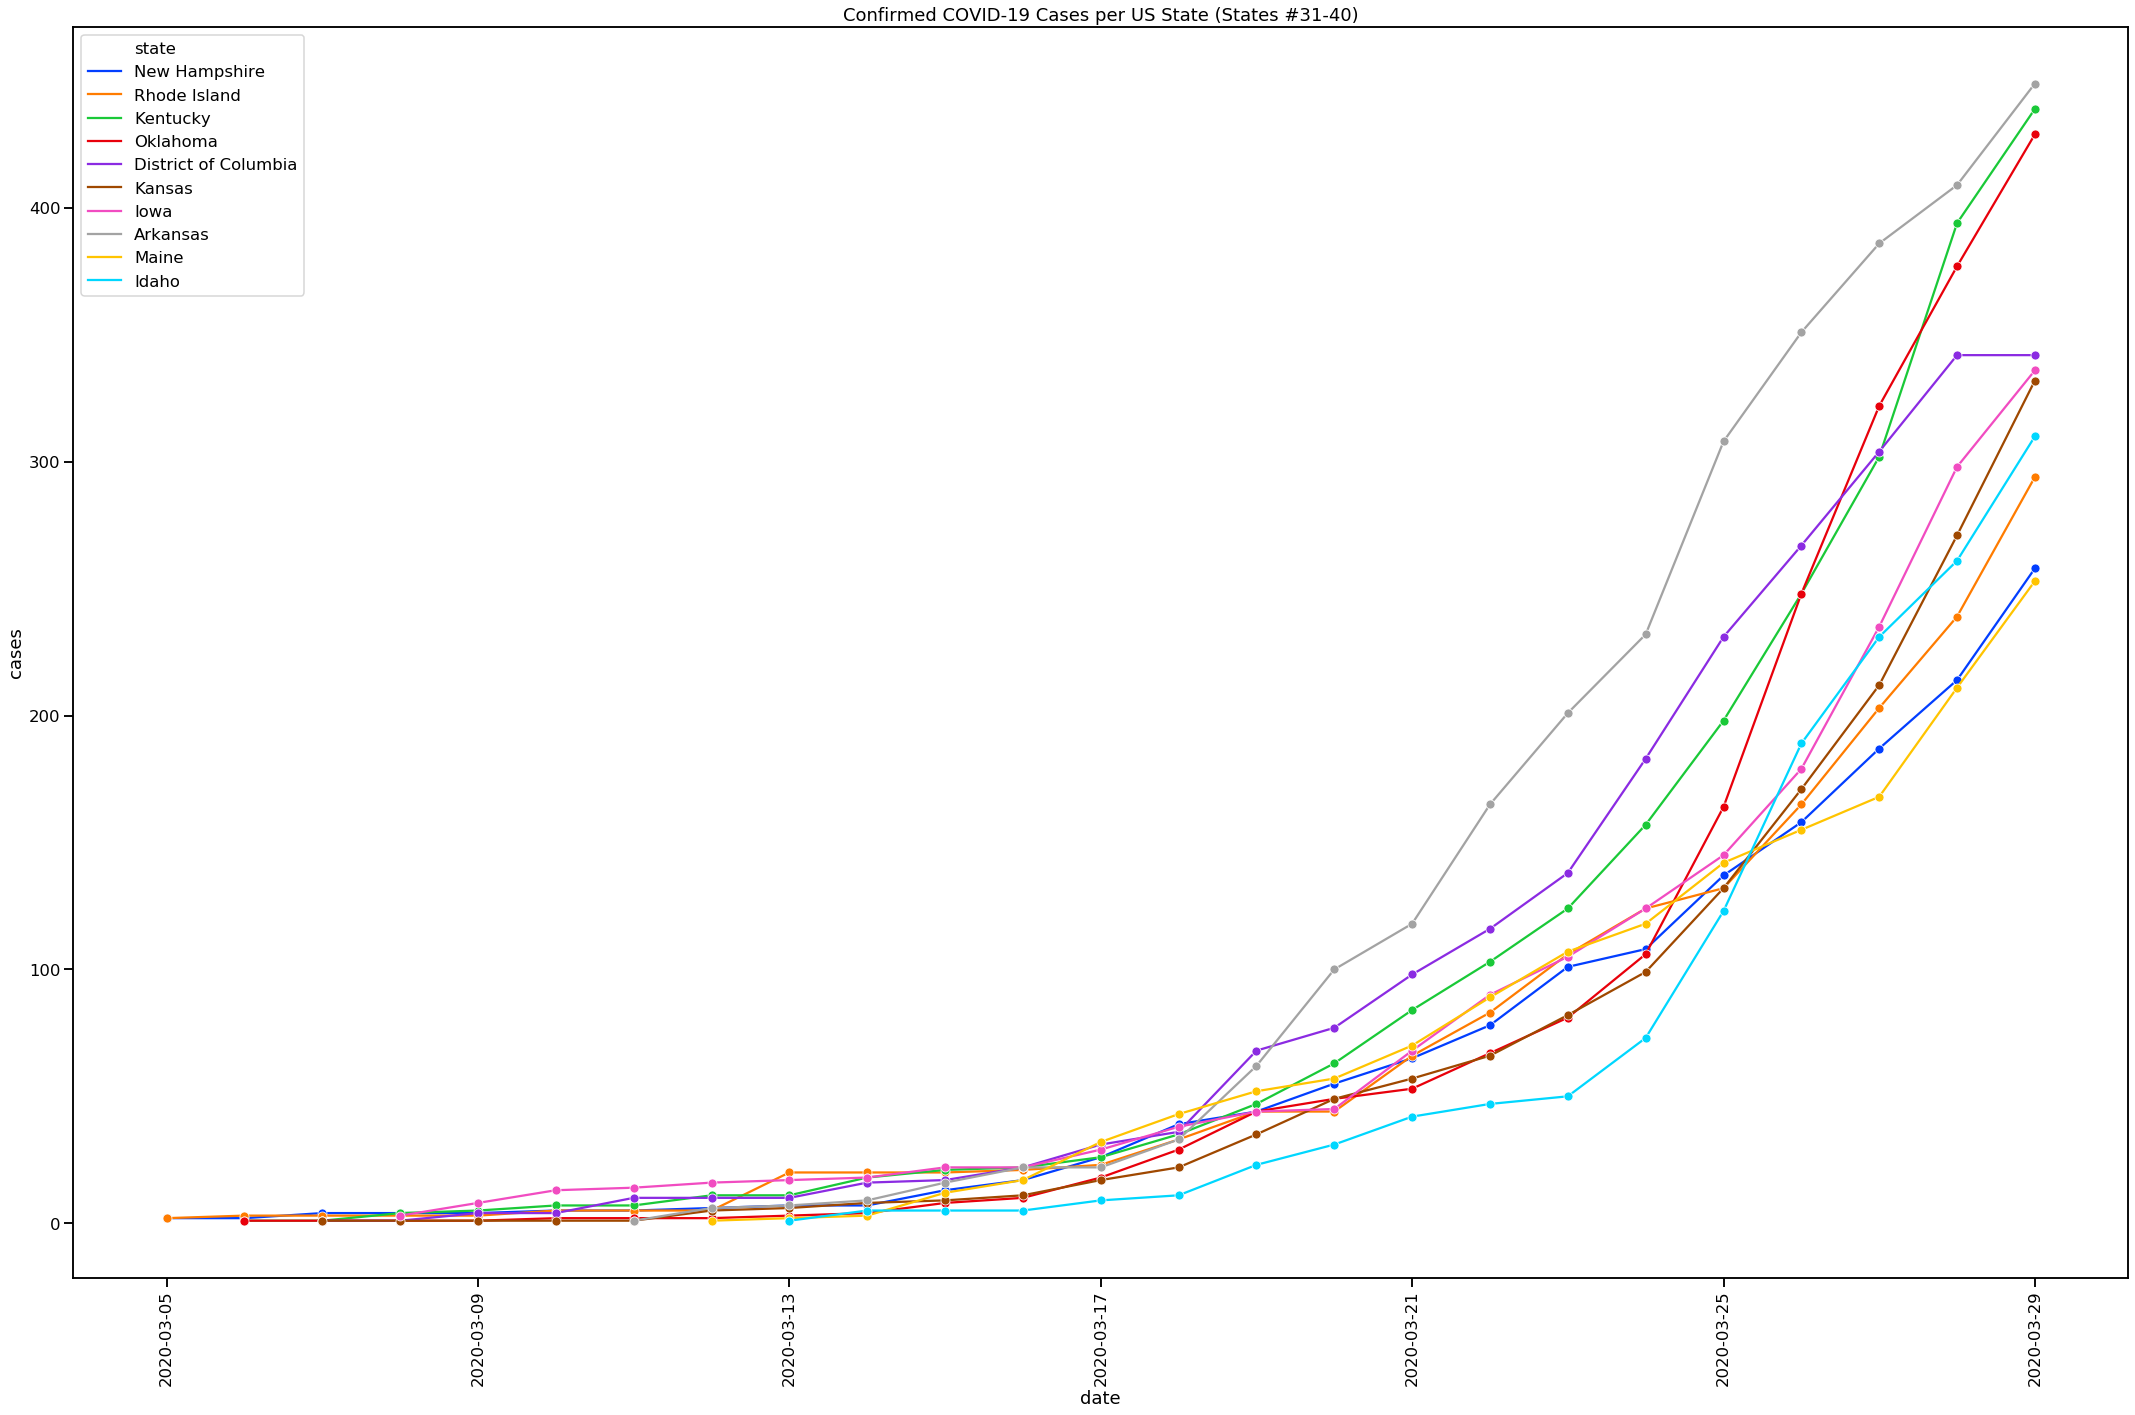

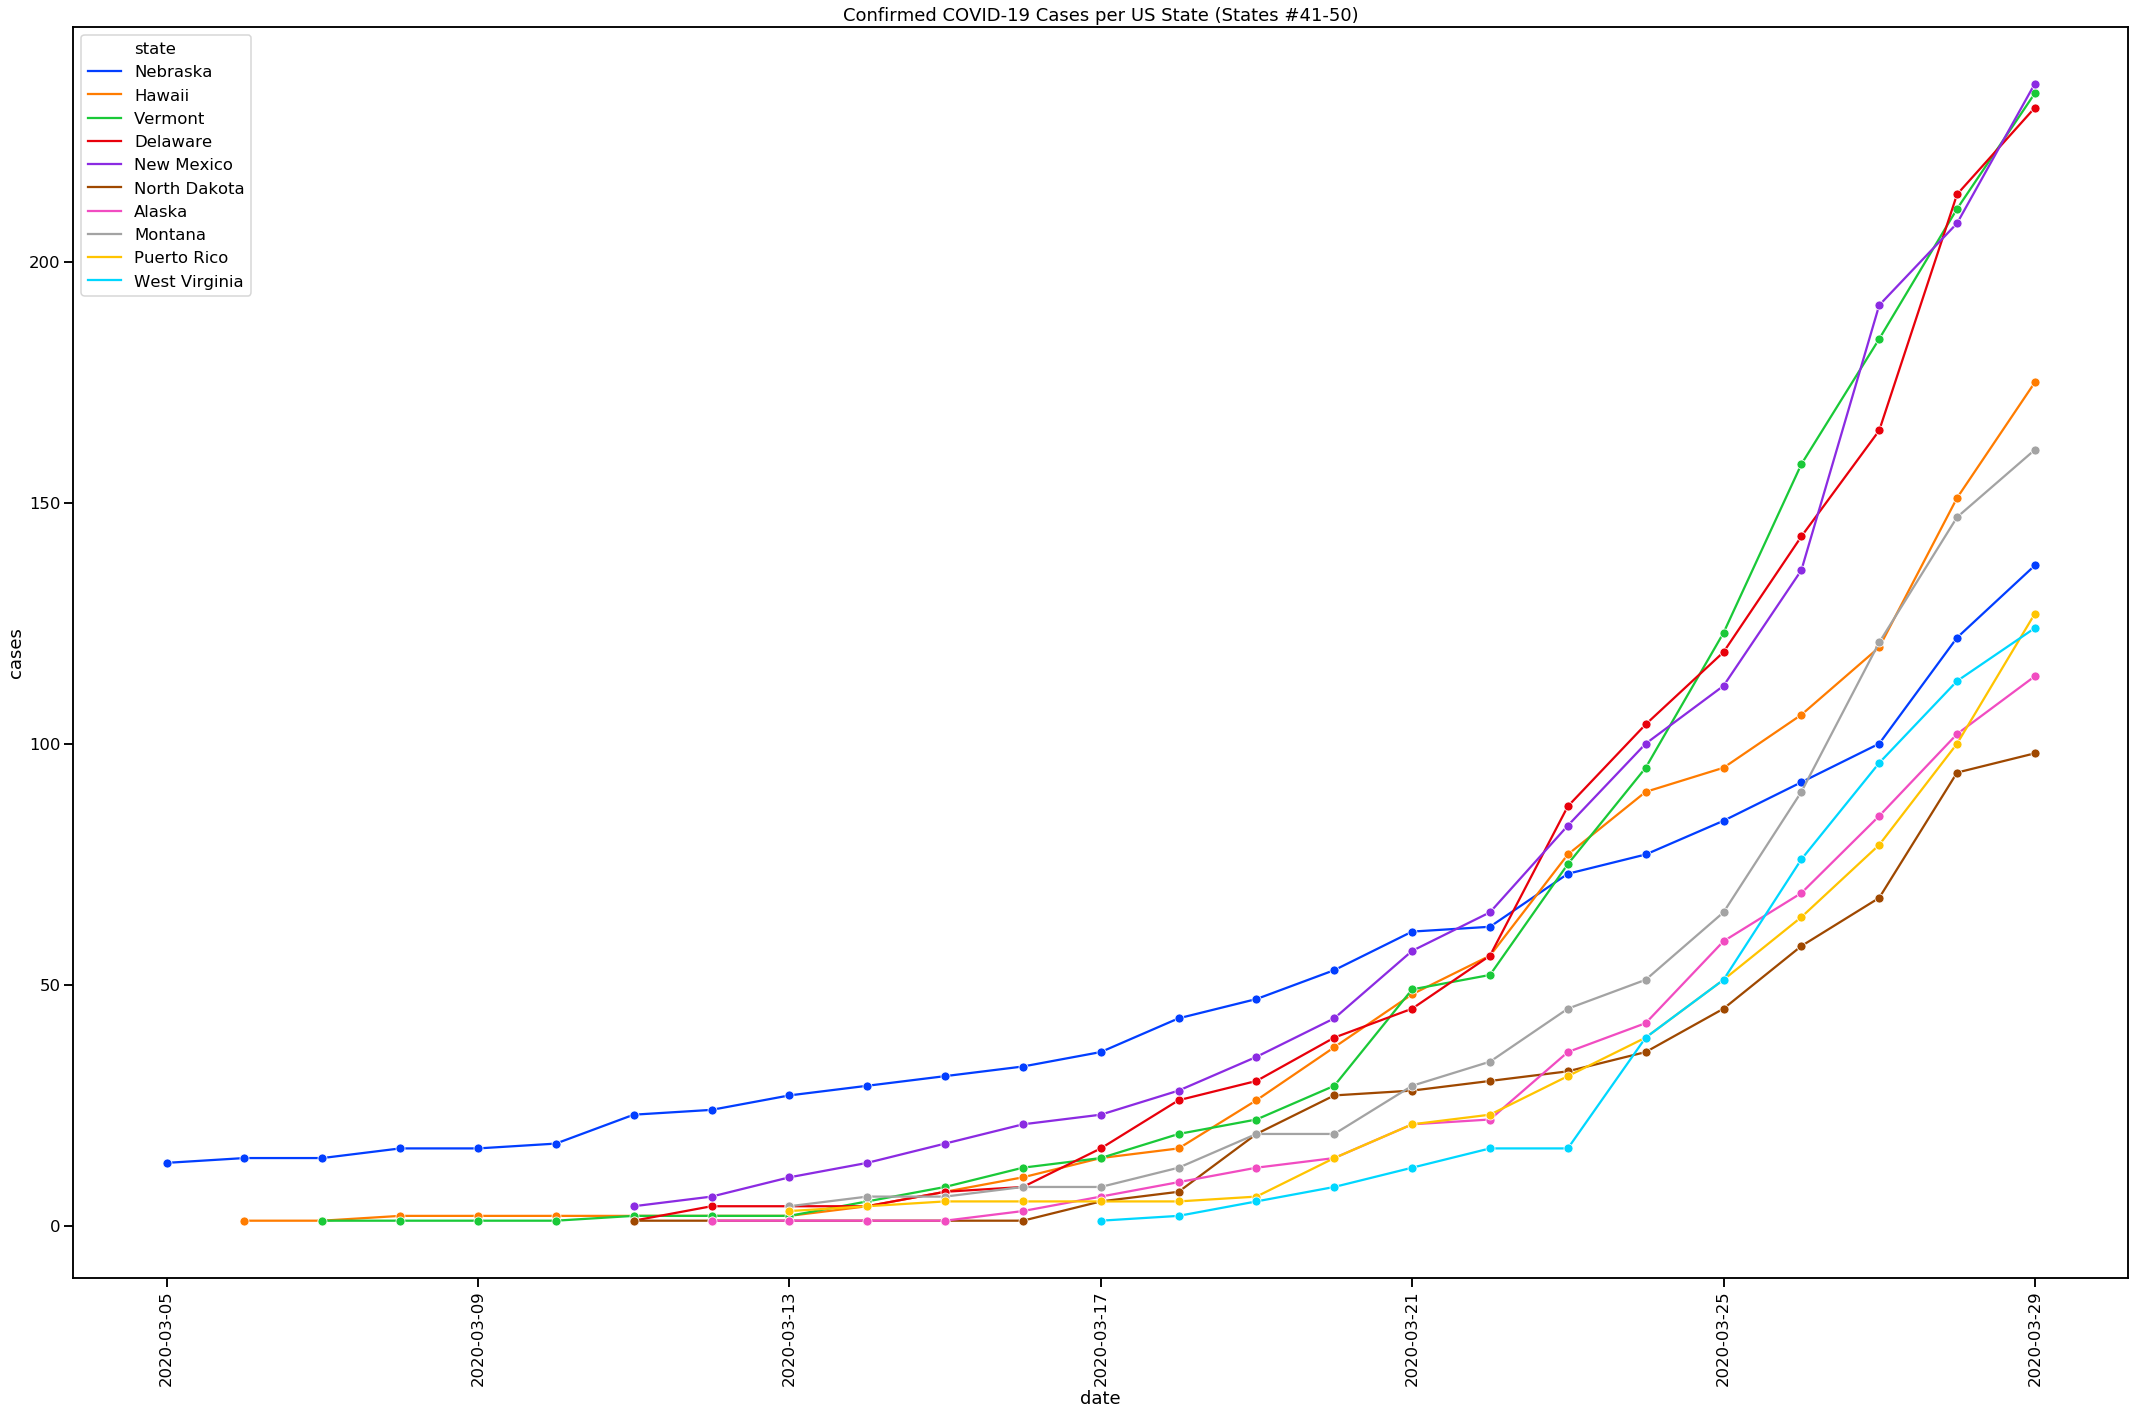

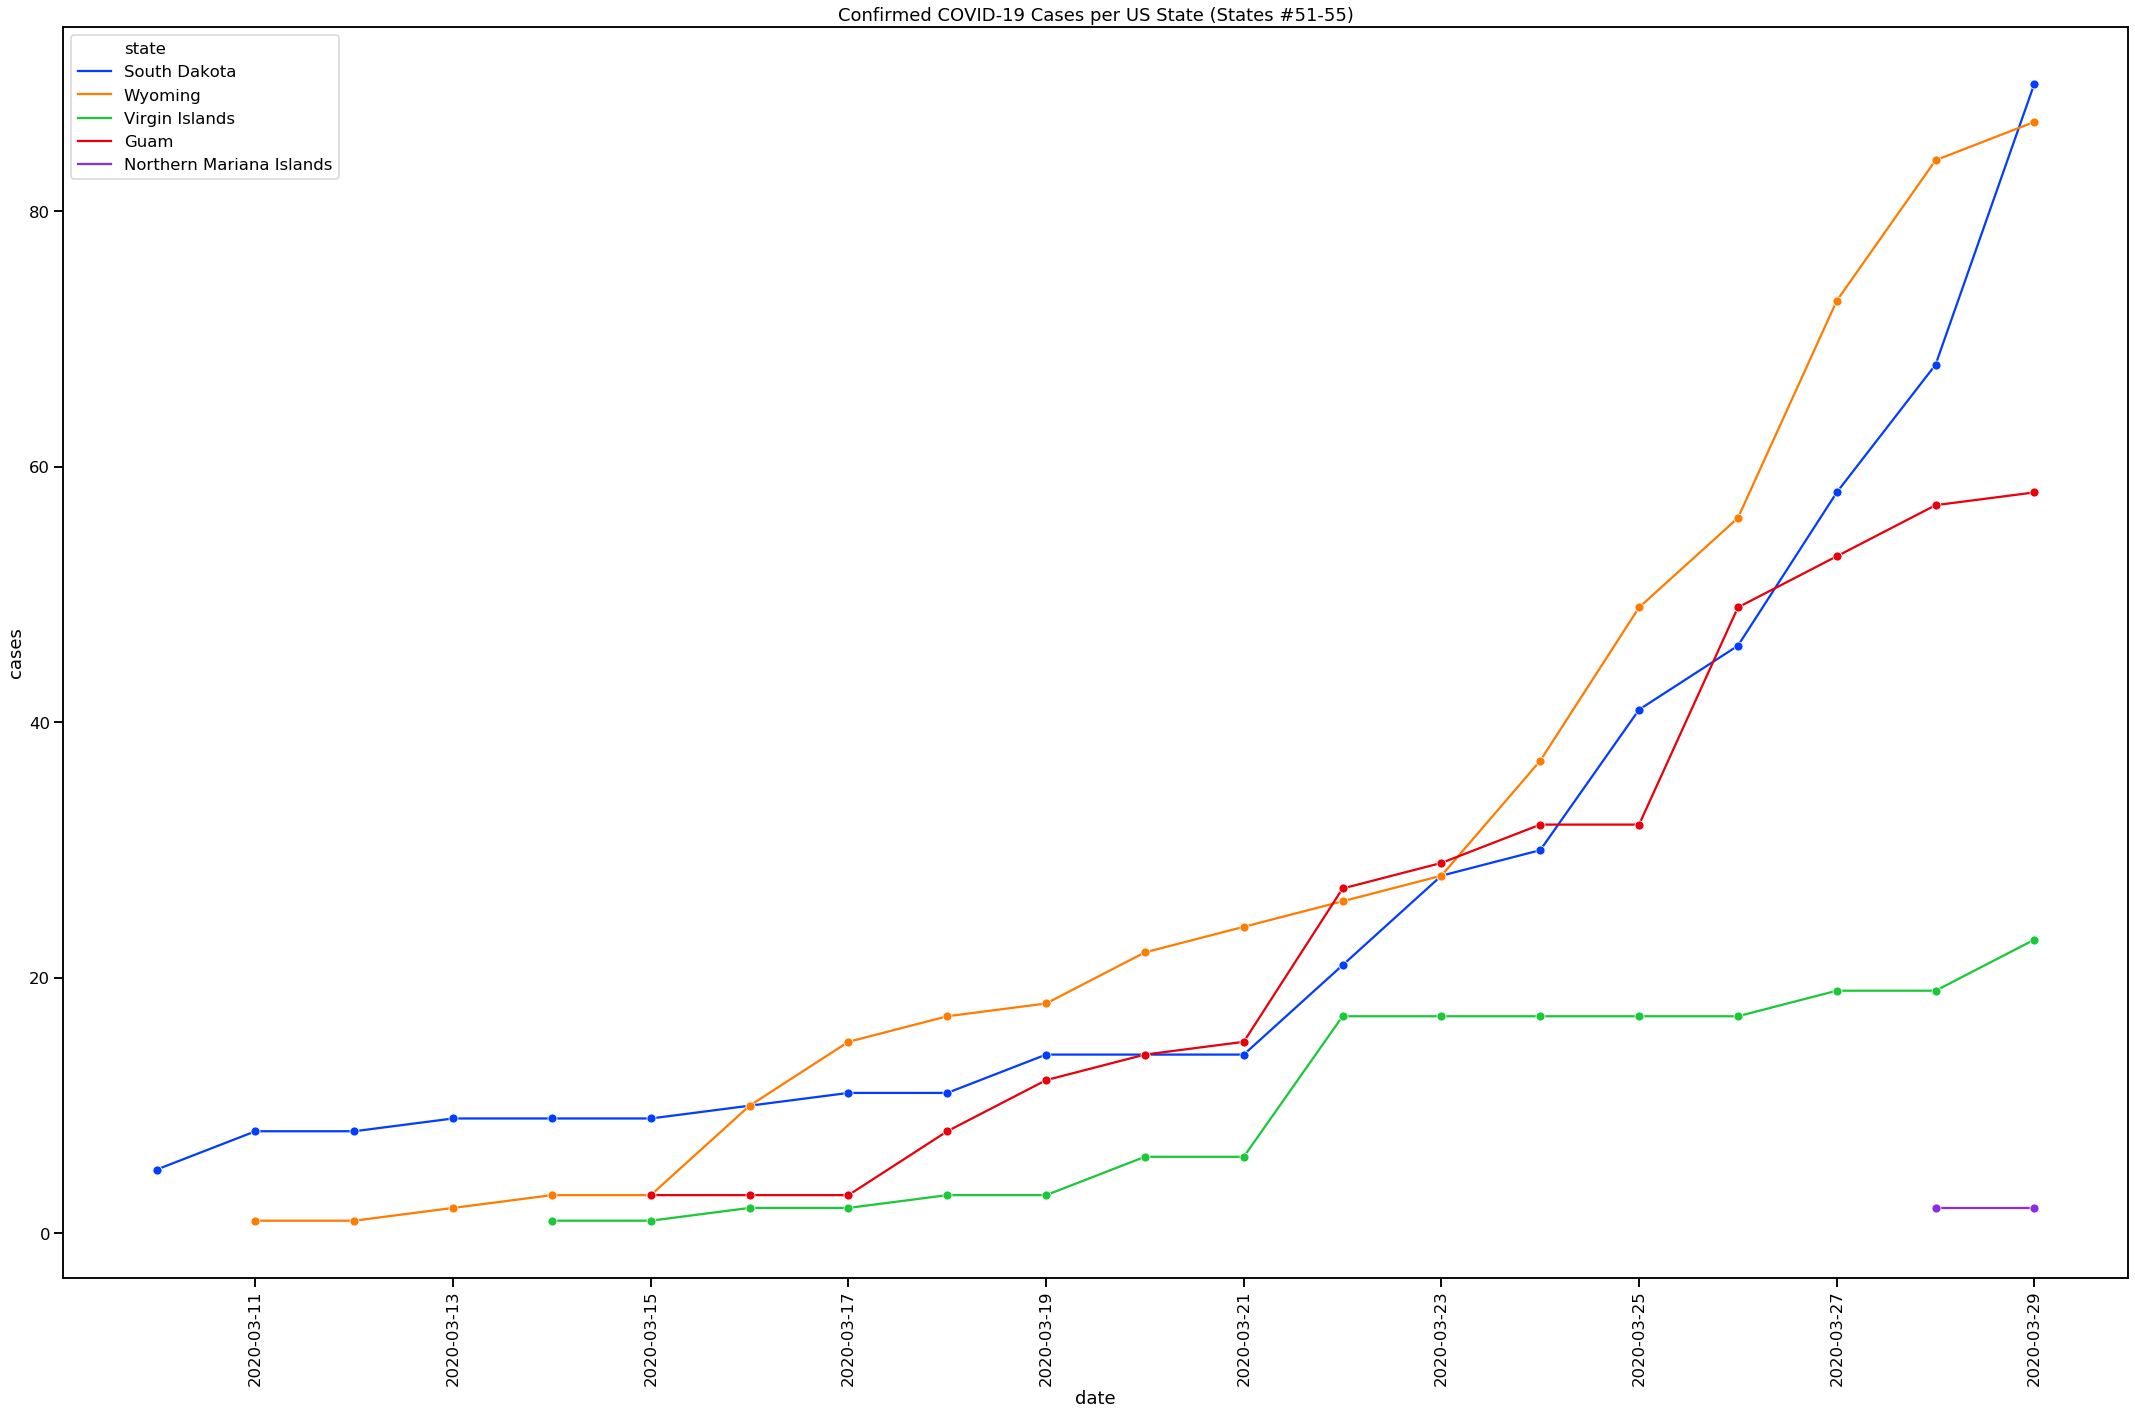

In [387]:
for i, group in enumerate(state_groups):
    states_to_plot = df_states.loc[df_states['state'].isin(group)]
    
    plt.figure(figsize=(30,20))
    sns.lineplot(x=states_to_plot['date'], y=states_to_plot['cases'], hue=states_to_plot['state'], marker='o', ci=False, palette=SEABORN_PALETTE[:len(group)])
    plt.xticks(rotation=90);
    plt.title(f'Confirmed COVID-19 Cases per US State (States #{i*group_size+1}-{i*group_size+len(group)})')
    plt.tight_layout()
    plt.show()